In [3]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
from collections import Counter

## 디올

In [10]:
mag_d = pd.read_csv('./magazine/final/magazine_d_stickword.csv', sep ='|', encoding = 'utf-8')

In [11]:
mag_d

,magazine,brand,title,link,date,word_dior,ADFN,ADFN_2
0,A,D,빈티지 쇼핑의 시대,http://www.allurekorea.com/2020/10/27/%eb%b9%8...,2020-10-27,"['그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',..."
1,A,D,"주식을 시작한 패션 에디터의 이야기, 나는 주주다",http://www.allurekorea.com/2020/10/16/%ec%a3%b...,2020-10-16,[' 요즘 들어 주식은 친구들과의 대화에서 빼놓을 수 없는 주제가 되었다. 코로나...,"['요즘', '주식', '친구', '과의', '대화', '빼놓', '주제', '코로...","['요즘', '주식', '친구', '과의', '대화', '빼놓', '주제', '코로..."
2,A,D,거리로 나온 하이패션 슈즈들 4,http://www.allurekorea.com/2020/09/16/%eb%a6%a...,2020-09-16,"[""['나이키의 조던 시리즈들 중에서도 역대급으로 평가받는 ‘에어 디올’은 부르는 ...","['나이', '조', '덜', '시리즈', '역대', '급', '평가', '에어',...","['나이', '조', '덜', '시리즈', '역대', '급', '평가', '에어',..."
3,A,D,차정원부터 아이린까지. 옷 잘입는 셀럽들의 사복 패션에 등장한 뉴 백은 무엇?,http://www.allurekorea.com/2020/08/13/%ec%b0%a...,2020-08-13,['디올 레이디 디올 디올아무르 미니백 5백만원대'],"['DIOR', 'LADY', 'DIOR', 'DIOR', '아무르', '미니']","['DIOR', 'LADY', 'DIOR', 'DIOR', '아무르', '미니']"
4,A,D,DON’T CATEGORIZE ME / 유태오,http://www.allurekorea.com/2020/05/28/dont-cat...,2020-05-28,['실크 슬리브리스와 블랙 와이드 팬츠는 김서룡 옴므. 블랙 부츠는 보테가 베네타....,"['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '...","['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '..."
...,...,...,...,...,...,...,...,...
1754,W,D,가을의 하이킹,http://www.wkorea.com/2016/09/05/%ea%b0%80%ec%...,2016-09-05,['6. 주얼 장식과 앙증맞은 리본이 반전의 매력을 더하는 부츠는 디올 제품. 1백...,"['얼', '장식', '앙증맞', '리본', '반전', '매력', '부츠', 'DI...","['얼', '장식', '앙증맞', '리본', '반전', '매력', '부츠', 'DI..."
1755,W,D,W해시태그,http://www.wkorea.com/2016/09/02/w%ed%95%b4%ec...,2016-09-02,"['#W뷰티콕 (뷰티 디렉터 송시은)\\n조회 2,023회\\n너무나 뜨거운 여름...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',..."
1756,W,D,마법의 색,http://www.wkorea.com/2016/09/02/%eb%a7%88%eb%...,2016-09-02,"[""'크리스찬 디올에게 초록은 곧 ‘자연’을, 빨강은 ‘생명’을, 분홍은 ‘감미로움...","['CHRISTIAN', 'DIOR', '초록', '자연', '빨강', '생명', ...","['CHRISTIAN', 'DIOR', '초록', '자연', '빨강', '생명', ..."
1757,W,D,따로 또 같이,http://www.wkorea.com/2016/09/02/%eb%94%b0%eb%...,2016-09-02,"['자수 장식 슈트, 실크 셔츠에 리본 타이를 연출한 구찌, 남성다운 검정 테일러드...","['자수', '장식', '슈트', '실크', '셔츠', '리본', '타이', '남성...","['자수', '장식', '슈트', '실크', '셔츠', '리본', '타이', '남성..."


In [12]:
mag_d['word'] = mag_d['word_dior']

In [13]:
mag_D = mag_d[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [14]:
len(mag_D)

1759

### 5

In [18]:
idx5 = []
for i in range(len(mag_D)):
    if i % 5 == 0 :
        idx5.append(i)

In [19]:
mag_D5 = mag_D.loc[idx5]

In [21]:
len(mag_D5)

352

In [20]:
mag_D5.reset_index(drop = True, inplace = True)

### 4

In [15]:
idx4 = []
for i in range(len(mag_D)):
    if i % 4 == 0 :
        idx4.append(i)

In [16]:
mag_D4 = mag_D.loc[idx4]

In [17]:
len(mag_D4)

440

In [95]:
mag_D4.reset_index(drop = True, inplace = True)

## 리사

### 리사 (유튜브 + 매거진)

In [5]:
tot_l = pd.read_csv('./magazine/final/video_lisa_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [6]:
tot_l['word'] = tot_l['word_lisa']

In [7]:
tot_L = tot_l[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [8]:
len(tot_L)

197

### 디올 + 리사

In [22]:
D5L = pd.concat([mag_D5, tot_L])

In [23]:
D5L.reset_index(drop = True, inplace = True)

In [24]:
D5L.to_csv('./magazine/final/D5L.csv', sep = '|', encoding = 'utf-8', index = False)

In [25]:
len(D5L)

549

In [96]:
# D4JE = pd.concat([mag_D4, tot_JE])

In [97]:
# D4JE.reset_index(drop = True, inplace = True)

In [98]:
# D4JE.to_csv('./magazine/final/D4JE.csv', sep = '|', encoding = 'utf-8', index = False)

In [99]:
# len(D4JE)

791

## stopword 추가

In [53]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [54]:
sw_df.columns = ['stopword']

In [55]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [56]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [57]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [58]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해']
for w in add_0:
    stop_words.append(w)

In [59]:
add_1 = ['BLACKPINK', '제니', '지수', '로제']
for w in add_1:
    stop_words.append(w)

In [60]:
add_2 = []
for w in add_1:
    stop_words.append(w)

In [61]:
len(stop_words)

829

In [62]:
D5L['ADFN_2'] = D5L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

AttributeError: Can only use .str accessor with string values!

In [63]:
noun_adj_list = []
for i in range(len(D5L)):
    for word in D5L.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [64]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('리사', 3570), ('DIOR', 952), ('예쁘다', 676), ('귀엽다', 543), ('춤', 483), ('패션', 380), ('사랑', 354), ('컬렉션', 295), ('랩', 279), ('한국', 271), ('영어', 248), ('노래', 227), ('무대', 226), ('멤버', 218), ('얼굴', 211), ('브랜드', 210), ('잘', 206), ('매력', 191), ('룩', 186), ('아이돌', 178), ('중국', 175), ('스타일', 174), ('컬러', 173), ('태국', 170), ('드레스', 163), ('쇼', 163), ('느낌', 159), ('한국어', 155), ('모델', 150), ('블랙', 147), ('한국인', 146), ('표정', 134), ('비율', 133), ('여성', 130), ('백', 129), ('멋있다', 129), ('전소민', 129), ('시즌', 126), ('공유', 126), ('실력', 124), ('눈', 122), ('디자이너', 120), ('재킷', 119), ('티', 118), ('외국인', 117), ('여자', 116), ('팬', 116), ('모습', 113), ('파리', 112), ('하우스', 109), ('디렉터', 109), ('장식', 108), ('인기', 107), ('머리', 106), ('세계', 104), ('최고', 103), ('봄', 102), ('MARIA', 101), ('아이템', 101), ('발음', 101), ('걸', 98), ('SADDLE', 97), ('데님', 96), ('양세찬', 96), ('팬츠', 95), ('스타', 93), ('처음', 89), ('연습생', 88), ('DESIGN', 87), ('데뷔', 86), ('호랑이', 86), ('스커트', 85), ('그룹', 83), ('한편', 82), ('참석', 81), ('제일', 81), ('선

In [65]:
count = Counter(noun_adj_list)

In [66]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('리사', 3570)
('DIOR', 952)
('예쁘다', 676)
('귀엽다', 543)
('춤', 483)
('패션', 380)
('사랑', 354)
('컬렉션', 295)
('랩', 279)
('한국', 271)
('영어', 248)
('노래', 227)
('무대', 226)
('멤버', 218)
('얼굴', 211)
('브랜드', 210)
('잘', 206)
('매력', 191)
('룩', 186)
('아이돌', 178)
('중국', 175)
('스타일', 174)
('컬러', 173)
('태국', 170)
('드레스', 163)
('쇼', 163)
('느낌', 159)
('한국어', 155)
('모델', 150)
('블랙', 147)
('한국인', 146)
('표정', 134)
('비율', 133)
('여성', 130)
('백', 129)
('멋있다', 129)
('전소민', 129)
('시즌', 126)
('공유', 126)
('실력', 124)
('눈', 122)
('디자이너', 120)
('재킷', 119)
('티', 118)
('외국인', 117)
('여자', 116)
('팬', 116)
('모습', 113)
('파리', 112)
('하우스', 109)
('디렉터', 109)
('장식', 108)
('인기', 107)
('머리', 106)
('세계', 104)
('최고', 103)
('봄', 102)
('MARIA', 101)
('아이템', 101)
('발음', 101)
('걸', 98)
('SADDLE', 97)
('데님', 96)
('양세찬', 96)
('팬츠', 95)
('스타', 93)
('처음', 89)
('연습생', 88)
('DESIGN', 87)
('데뷔', 86)
('호랑이', 86)
('스커트', 85)
('그룹', 83)
('한편', 82)
('참석', 81)
('제일', 81)
('선택', 80)
('예능', 80)
('영감', 79)
('여름', 79)
('완성', 77)
('옷', 76)
('화이트', 76)
('미

In [67]:
top500 = pd.DataFrame(word_list)

In [68]:
top500.columns = ['word', 'count']

In [69]:
top500.to_csv('./D5L_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [70]:
import matplotlib.pyplot as plt

In [71]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [72]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [73]:
from wordcloud import WordCloud

In [74]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

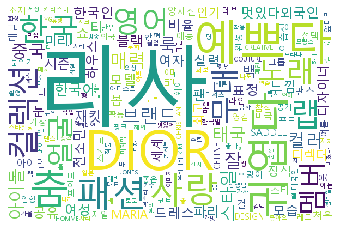

In [75]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('wc_D5L_top500.png')

In [76]:
D5L.to_csv('./magazine/final/D5L_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)